In [1]:
import scipy.io
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

#import tensorflow as tf


In [2]:
from comsolml import read_data
from comsolml.custom_fk import make_fk
from comsolml.custom_ml import make_autoencoder, do_regression, plot_reg_results
from comsolml.noise import make_noise_abs

In [3]:
scale_factor = 1e14
noiselev = 0.005
timesamples = 400

In [4]:
filenames_mat = ['concat_traces_systematic_f60_145_avg79.mat',
#                 'concat_traces_systematic_f80_145_avg79.mat',
                 'concat_traces_random_f60_145_avg79.mat',
#                 'concat_traces_random_f80_145_avg79.mat'
                 ]
filenames_labels = ['labels_systematic_f60_145_avg79.csv',
#                    'labels_systematic_f80_145_avg79.csv',
                    'labels_random_f60_145_avg79.csv',
#                    'labels_random_f80_145_avg79.csv'
                    ]

In [5]:
for i, (filename_mat, filename_labels) in enumerate(zip(filenames_mat, filenames_labels)):
    print(filename_labels)
    X_temp = read_data.read_synth(Path().joinpath('..', 'data', 'input_synth', filename_mat),
                                  'concat_traces', 
                                  firsttrace=0, decim=1, 
                                  geom_spread='True')[:,:,:timesamples]*scale_factor
    labels_temp = pd.read_csv(Path().joinpath('..','data', 'input_synth', filename_labels))
    if i == 0:
        X_c = X_temp
        labels = labels_temp
    else:
        X_c = np.concatenate((X_c, X_temp))
        labels = pd.concat([labels, labels_temp])
    

labels_systematic_f60_145_avg79.csv
labels_random_f60_145_avg79.csv


In [6]:
X_n = X_c + make_noise_abs(noiselev, X_c.shape)

In [7]:
X_n.shape

(6182, 144, 400)

In [8]:
max(-X_n.min(), X_n.max()), max(-X_c.min(), X_c.max())

(0.7530262210717901, 0.75501275)

In [9]:
len(labels)

6182

In [10]:
labels.rename(columns={'thickness':'Thickness',
                       'depression':'Depression depth',
                       'pitting':'Pitting depth',
                       'depression_mu':'Depression location',
                       'depression_sigma':'Depression width',
                       'thickness_max':'Thickness maximum',
                       'thickness_min':'Thickness minimum',
                       'thickness_mean':'Thickness mean',
                       'thickness_median':'Thickness median',
                       'thickness_std':'Thickness std'}, inplace=True)

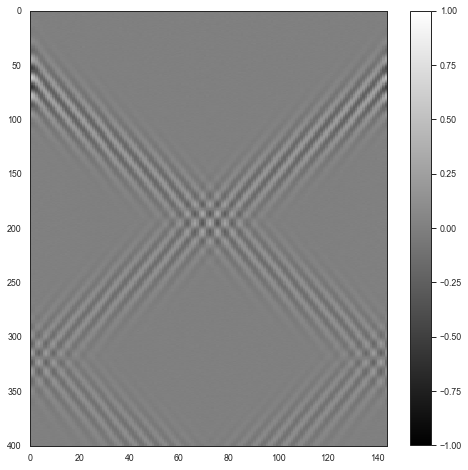

In [11]:
sns.set_style('white')
sns.set_context('paper')
plt.figure(figsize=(8,8))

plt.pcolormesh(X_n[0,:,:].T, cmap='gray')
plt.gca().invert_yaxis()
plt.colorbar()
plt.clim(-1, 1)


plt.show()

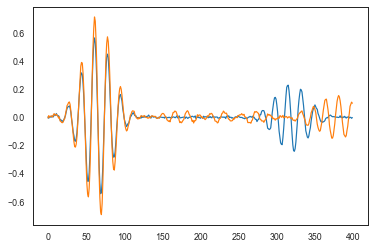

In [12]:
plt.figure()
plt.plot(X_n[0,0,:])
plt.plot(X_n[1083,0,:])
#plt.plot(X[0,72,:])
plt.show()

In [13]:
attributes = ['Thickness mean','Thickness minimum', 'Thickness std', 'Depression depth', 'Depression width','Depression location']

In [14]:
X_n.shape

(6182, 144, 400)

In [15]:
sensorindex = np.arange(0, 144, 12)
X_n_12 = np.take(X_n, sensorindex, axis=1)

In [16]:
X_n_12.shape

(6182, 12, 400)

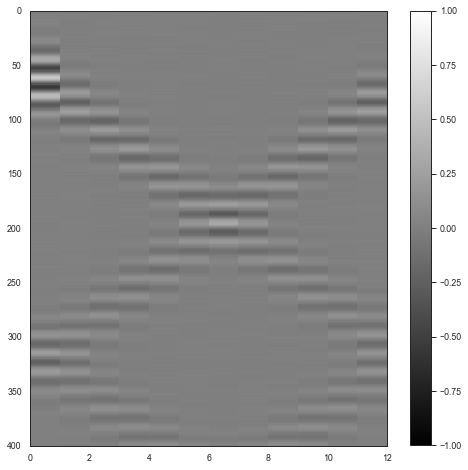

In [17]:
sns.set_style('white')
sns.set_context('paper')
plt.figure(figsize=(8,8))

plt.pcolormesh(X_n_12[0,:,:].T, cmap='gray')
plt.gca().invert_yaxis()
plt.colorbar()
plt.clim(-1, 1)


plt.show()

Thickness mean
Layer added; size: 32
Layer added; size: 16
Layer added; size: 8
Layer added; size: 4
Layer added; size: 2


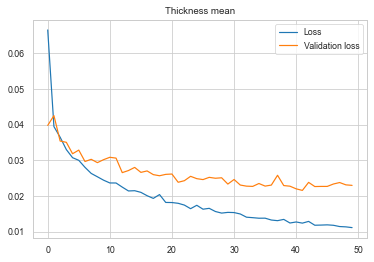

39/39 [==============================] - 0s 2ms/step - loss: 0.0230
loss: 0.023005109280347824
Thickness minimum
Layer added; size: 32
Layer added; size: 16
Layer added; size: 8
Layer added; size: 4
Layer added; size: 2


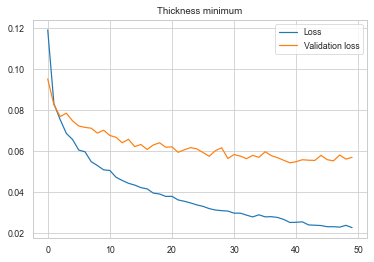

39/39 [==============================] - 0s 2ms/step - loss: 0.0568
loss: 0.056846734136343
Thickness std
Layer added; size: 32
Layer added; size: 16
Layer added; size: 8
Layer added; size: 4
Layer added; size: 2


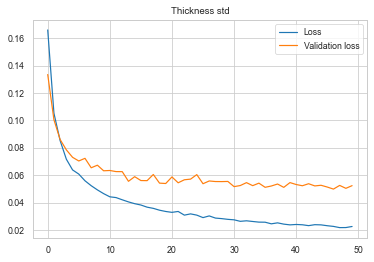

39/39 [==============================] - 0s 2ms/step - loss: 0.0524
loss: 0.05237038433551788
Depression depth
Layer added; size: 32
Layer added; size: 16
Layer added; size: 8
Layer added; size: 4
Layer added; size: 2


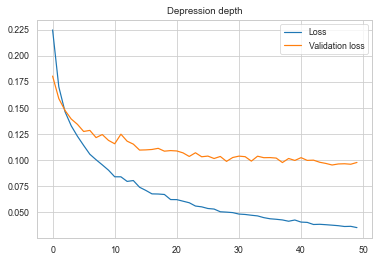

39/39 [==============================] - 0s 3ms/step - loss: 0.0978
loss: 0.09779127687215805
Depression width
Layer added; size: 32
Layer added; size: 16
Layer added; size: 8
Layer added; size: 4
Layer added; size: 2


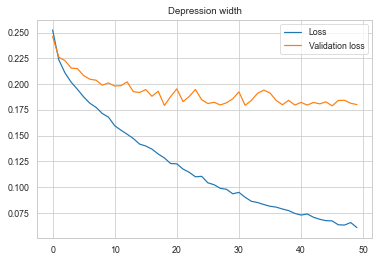

39/39 [==============================] - 0s 2ms/step - loss: 0.1801
loss: 0.18007725477218628
Depression location
Layer added; size: 32
Layer added; size: 16
Layer added; size: 8
Layer added; size: 4
Layer added; size: 2


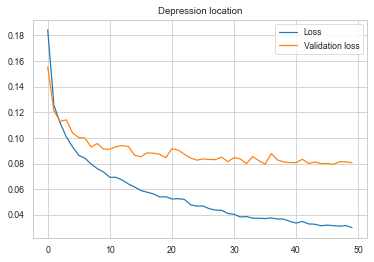

39/39 [==============================] - 0s 2ms/step - loss: 0.0806
loss: 0.08061234652996063


In [18]:
df_loss_12, df_test_12, df_predict_12, direct_regression_models_12, min_max_scalers_12 = do_regression(X_n_12, labels, attributes)

In [19]:
scales = np.array([[4.5, 10.5],
                   [-0.5, 8.5],
                   [0, 1.8],
                   [-0.5, 5.5],
                   [0, 100],
                   [100, 600]])
df_scales = pd.DataFrame(scales.T, columns=df_test_12.columns)

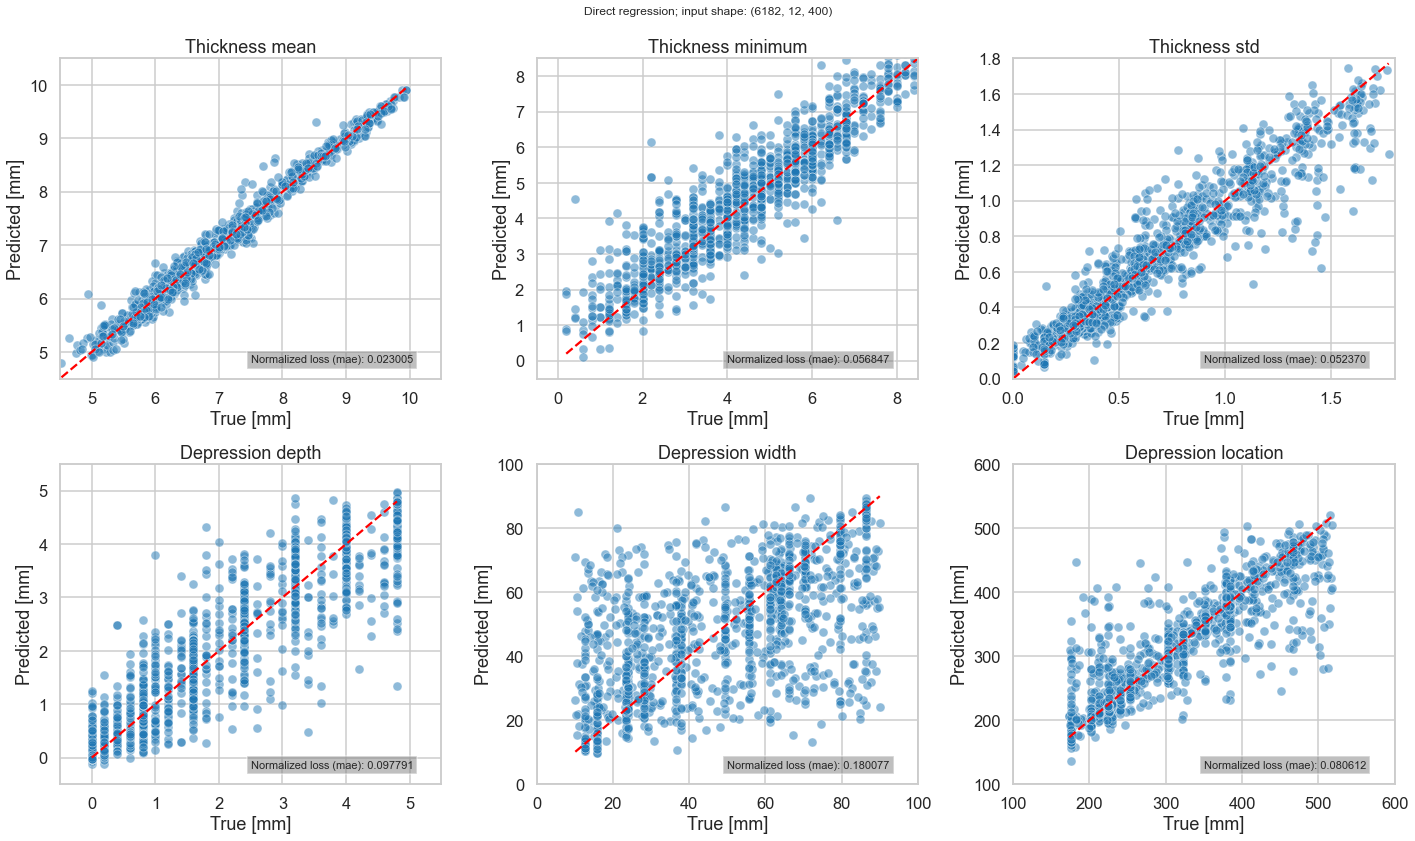

In [20]:
plot_reg_results(df_test_12, df_predict_12, df_loss_12, df_scales, perc=False, title=f'Direct regression; input shape: {str(X_n_12.shape)}')

In [21]:
df_loss_12

,Thickness mean,Thickness minimum,Thickness std,Depression depth,Depression width,Depression location
0,0.023005,0.056847,0.05237,0.097791,0.180077,0.080612


In [22]:
direct_regression_models_12['Thickness mean'].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                307264    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 310,049
Trainable params: 310,049
Non-trai